<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: World Development Statistics

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

Decide on your problem statement that will guide your analysis for this project. For guidelines, sample prompts, or inspiration, check out the README.

**To-Do:** *Does higher government health spending mitigate the negative impact of income inequality on life expectancy?*

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

For our first project, we're going to take a look at World Development Statistics from [Gapminder](https://www.gapminder.org/about/), an independent Swedish foundation that aims to make data about the world more accessible and reliable. A good introduction on Gapminder is this [Ted Talk](https://www.ted.com/talks/hans_rosling_the_best_stats_you_ve_ever_seen) from Hans Rosling, which also shows how effective data visualization can be for your audience.

**To-Do:** *Life expectancy is often used as a key indicator of a nation’s overall well-being, yet significant disparities exist across countries and income groups. While it is widely known that wealthier nations tend to have higher life expectancies, the role of government health spending in mitigating inequalities in longevity is less clear. We will try to uncover this relationship because it is crucial for shaping national policy, especially in countries with high income inequality.*

*Economic inequality, which for our puposes we will be using the Gini coefficient, has been linked to deaths and health, but whether increased public health investment can counteract this effect is still unclear. In countries where inequality is high, we can predict that low income individuals have less access to health clinics and foods rich in nutrition.*

*This project aims to analyze if government health spending influences life expectancy in countries with varying levels of income inequality. Using publicly available datasets from Gapminder, this study will explore trends over time, assess correlations between public health expenditure and life expectancy, and evaluate whether higher spending helps close the longevity gap between high- and low-income populations. The findings could provide insights into the effectiveness of policy implentations of the United Nations and help in reducing health disparities and improving overall quality of life.*

### Choose your Data

There are 3 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online. 

**HINT: There are more datasets available on the Gapminder website**


**To-Do:** 
* [`life_expectancy.csv`](./data/life_expectancy.csv): Life expectancy of a newborn if the current mortality rates at different ages were to stay the same throughout its lifetime.
* [`gni_per_cap_atlas_method_con2021.csv`](./data/gni_per_cap_atlas_method_con2021.csv): Gross National Income (GNI) per capita in current US dollars.
* [`gini.csv`](https://www.gapminder.org/data/): Gini Coefficient of each country by year. The Gini ranges from 0-100 and shows income inequality in a society. The closer to 100, the more inequality.
* [`government_health_spending_of_total_gov_spending_percent.csv`](): Percent of total country expenditure that has been expended in health by year.

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on state policies or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

**To-Do:** 

*“… in 2023 the world’s richest 1 percent, those with more than $1 million, owned 47.5 percent of all the world’s wealth”*

via: inequality.org


*“Inequality contributes to the deaths of at least 21,300 people each day”*

via: oxfam.org

* Global Inequality has been a long standing issue in society and is responsible for many devastating outcomes such as these death tolls. It's important that we analyze the relationship between life expectancy and government health spending as well as the relationship between government health spending and inequality levels. These insights will help paint a clearer picture to the members of the United Nations and close the longevity gap.

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [16]:
# Code:
def mean_of(values):
    return sum(values) / len(values)

In [17]:
my_list = [10, 20, 30, 40]

In [18]:
mean_of(my_list)

25.0

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [20]:
# Code:
def standard_dev(values):
    mean = mean_of(values)
    squared_diff = [(num - mean) ** 2 for num in values]
    variance = sum(squared_diff) / len(values)
    standard_deviation = variance ** 0.5
    return standard_deviation

In [21]:
standard_dev(my_list)

11.180339887498949

3. Data cleaning function:
    
    Write a function that takes in a string consisting a number and an abbreviated place value (ex. '5M', '45K'), and converts that string to an integer. For example, inputting '5M' in your function should return 5000000, '45K' should return 45000, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [23]:
# Code:
def convert_to_integer(value_str):
    try:
        
        number = float(value_str[:-1])  
        abbreviation = value_str[-1].upper()  
        

        if abbreviation == 'K':
            multiplier = 1000
        elif abbreviation == 'M':
            multiplier = 1000000
        elif abbreviation == 'B':
            multiplier = 1000000000
        else:
            return None  
        
        
        return int(round(number * multiplier))
    
    except ValueError:
        return None  


In [24]:
convert_to_integer('45m')

45000000

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [27]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind reasonable values for each column).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of abbreviated numbers (ex. '3M', '45K', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to integers! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

### Cleaning GNI per Capita Dataset

In [31]:
# We will load in the dataset now
gni_per_capita = pd.read_csv("../data/gni_per_cap_atlas_method_con2021.csv")

In [32]:
gni_per_capita.tail()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
186,Samoa,373.0,373.0,373.0,373.0,373.0,373.0,373.0,374.0,374.0,...,5330,5440,5560,5670,5790,5920,6040,6170,6300,6440
187,Yemen,197.0,198.0,198.0,199.0,199.0,200.0,200.0,201.0,202.0,...,1440,1470,1500,1530,1560,1590,1630,1660,1700,1730
188,South Africa,800.0,791.0,782.0,773.0,765.0,724.0,724.0,786.0,687.0,...,7630,7790,7960,8130,8300,8480,8660,8840,9030,9220
189,Zambia,213.0,214.0,215.0,215.0,215.0,216.0,216.0,217.0,217.0,...,1260,1290,1320,1340,1370,1400,1430,1460,1490,1520
190,Zimbabwe,443.0,444.0,444.0,445.0,445.0,446.0,446.0,446.0,447.0,...,1560,1590,1620,1660,1690,1730,1770,1800,1840,1880


In [33]:
gni_per_capita.shape

(191, 252)

Taking a look at the null values and datatypes of the dataset.

In [35]:
gni_per_capita.isnull().sum()

country    0
1800       1
1801       1
1802       1
1803       1
          ..
2046       1
2047       1
2048       1
2049       1
2050       1
Length: 252, dtype: int64

In [36]:
print(gni_per_capita.dtypes)

country     object
1800       float64
1801       float64
1802       float64
1803       float64
            ...   
2046        object
2047        object
2048        object
2049        object
2050        object
Length: 252, dtype: object


**There are clearly some null variables in the data set, but the way that the data set is formatted, its really hard to read those null values and data types of each column when each coulmn is a year.**

**Since in this case each column (year) represents the same type of data, we will want to combine them into a single column. This will make it easier to read as well as make null values and datatypes more clear.**

In [38]:
# To do this we are going to use the pd.melt function. We will name the column 'year'.
gni_per_capita_melted = pd.melt(gni_per_capita, id_vars=["country"], var_name = "year", value_name = "gni_per_capita")

In [39]:
gni_per_capita_melted.head()

,country,year,gni_per_capita
0,Afghanistan,1800,207.0
1,Angola,1800,517.0
2,Albania,1800,207.0
3,United Arab Emirates,1800,738.0
4,Argentina,1800,794.0


In [40]:
# Visted StackOverfloww to custruct my merging code
# https://stackoverflow.com/questions/45678202/melt-and-merge-on-substring-python-pandas

In [41]:
# Lets take a look at the results of the merge
gni_per_capita_melted.describe()

,country,year,gni_per_capita
count,47941,47941,47712.0
unique,191,251,4162.0
top,Afghanistan,1800,194.0
freq,251,191,114.0


In [42]:
gni_per_capita_melted.isnull().sum()

country             0
year                0
gni_per_capita    229
dtype: int64

**The gni cloumn has 229 null values which we will handle later on after further investigation.**

In [44]:
# Lets checkout the data types in the merged dataset
gni_per_capita_melted.dtypes

country           object
year              object
gni_per_capita    object
dtype: object

**The year field is an object which is an issue since it should be an integer. GNI should also be connverted but into a float. We can change that now.**

In [46]:
# Conversion
gni_per_capita_melted['year'] = gni_per_capita_melted['year'].astype(int)

In [47]:
gni_per_capita_melted.dtypes

country           object
year               int64
gni_per_capita    object
dtype: object

In [48]:
gni_per_capita_melted['country'] = gni_per_capita_melted['country'].astype(str)

**For consistency, we are replacing the names of sum countries so they will match with all four datasets.**

In [50]:
country_fix = {
    "USA": "United States",
    "UK": "United Kingdom",
    "UAE": "United Arab Emirates",
    "Hong Kong, China": "Hong Kong"
}
gni_per_capita_melted['country'] = gni_per_capita_melted['country'].replace(country_fix)

### Gini Dataset

Now, we will repeat the process for the gini dataset.

In [53]:
gini_coefficient = pd.read_csv("../data/gini.csv")

In [54]:
gini_coefficient.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,...,38.2,38.2,38.2,38.2,38.2,38.2,38.2,38.2,38.2,38.2
1,Angola,57.7,57.7,57.7,57.7,57.7,57.7,57.7,57.7,57.7,...,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0
2,Albania,39.9,39.9,39.9,39.9,39.9,39.9,39.9,39.9,39.9,...,33.7,33.7,33.7,33.7,33.7,33.7,33.7,33.7,33.7,33.7
3,Andorra,42.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5,...,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0
4,UAE,39.8,39.8,39.8,39.8,39.8,39.8,39.8,39.7,39.7,...,25.9,25.9,25.9,25.9,25.9,25.9,25.9,25.9,25.9,25.9


In [55]:
gini_coefficient.shape

(197, 252)

In [56]:
# Melting
gini_coefficient_melted = pd.melt(gini_coefficient, id_vars = ["country"], var_name = "year", value_name = "gini_coefficient")

In [57]:
gini_coefficient_melted.tail()

,country,year,gini_coefficient
49442,Samoa,2050,38.7
49443,Yemen,2050,37.4
49444,South Africa,2050,63.9
49445,Zambia,2050,57.8
49446,Zimbabwe,2050,50.9


In [58]:
gini_coefficient_melted.describe()

,gini_coefficient
count,49447.000000
mean,40.602977
std,8.592315
min,15.700000
25%,35.000000
50%,40.100000
75%,45.200000
max,81.600000


In [59]:
# Checking for null values
gini_coefficient_melted.isnull().sum()

country             0
year                0
gini_coefficient    0
dtype: int64

In [60]:
gini_coefficient_melted.dtypes

country              object
year                 object
gini_coefficient    float64
dtype: object

In [61]:
# For consistency, changing year to integer
gini_coefficient_melted['year'] = gini_coefficient_melted['year'].astype(int)

In [62]:
gini_coefficient_melted.dtypes

country              object
year                  int64
gini_coefficient    float64
dtype: object

In [63]:
gini_coefficient_melted['country'] = gini_coefficient_melted['country'].astype(str)

In [64]:
# Following suite with the fixed country names
gini_coefficient_melted['country'] = gini_coefficient_melted['country'].replace(country_fix)

### Government Health Spending Dataset

We will follow a similar cleaning process for the government health dataset.

In [67]:
gov_spending = pd.read_csv("../data/government_health_spending_of_total_gov_spending_percent.csv")

In [68]:
gov_spending.head()

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.48,1.48,1.48,1.48,1.48,1.48,1.48,1.58,1.59
1,Angola,5.00,2.68,3.57,3.15,1.76,3.26,6.06,3.74,4.83,4.12,4.38,6.06,5.75,6.40,10.10,7.18
2,Albania,5.26,6.34,6.47,6.10,7.18,7.03,7.24,7.32,7.64,9.23,9.79,9.05,8.46,8.21,8.42,8.42
3,Andorra,23.60,23.80,23.20,28.70,20.80,19.10,19.20,20.00,22.00,22.70,22.00,22.80,21.30,21.30,21.30,21.30
4,UAE,8.09,7.13,8.76,8.00,8.01,7.64,7.73,7.98,8.35,8.21,8.70,8.95,8.93,8.85,8.76,8.79


In [69]:
gov_spending.shape

(192, 17)

In [70]:
gov_spending_melted = pd.melt(gov_spending, id_vars = ["country"], var_name = "year", value_name = "percent_gov_health_spending")

In [71]:
gov_spending_melted.head()

,country,year,percent_gov_health_spending
0,Afghanistan,1995,NaN
1,Angola,1995,5.00
2,Albania,1995,5.26
3,Andorra,1995,23.60
4,UAE,1995,8.09


In [72]:
gov_spending_melted.isnull().sum()

country                         0
year                            0
percent_gov_health_spending    32
dtype: int64

In [73]:
# Melting
gov_spending_melted['year'] = gov_spending_melted['year'].astype(int)

In [74]:
gov_spending_melted.describe()

,year,percent_gov_health_spending
count,3072.000000,3040.000000
mean,2002.500000,10.937191
std,4.610523,4.586151
min,1995.000000,0.100000
25%,1998.750000,7.770000
50%,2002.500000,10.500000
75%,2006.250000,13.700000
max,2010.000000,42.400000


In [75]:
gov_spending_melted['country'] = gov_spending_melted['country'].astype(str)

In [76]:
# Again, following suite with the correct country names
gov_spending_melted['country'] = gov_spending_melted['country'].replace(country_fix)

### Life Expectancy Dataset

Finally the last dataset to clean is the life expectancy dataset.

In [79]:
life_expectancy = pd.read_csv('../data/life_expectancy.csv')

In [80]:
life_expectancy.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3


In [81]:
life_expectancy.shape

(195, 302)

In [82]:
# Melting
life_expectancy_melted = pd.melt(life_expectancy, id_vars = ["country"], var_name = "year", value_name = "life_expectancy")

In [83]:
life_expectancy_melted.head()

,country,year,life_expectancy
0,Afghanistan,1800,28.2
1,Angola,1800,27.0
2,Albania,1800,35.4
3,Andorra,1800,NaN
4,United Arab Emirates,1800,30.7


In [84]:
# Converting year to int for consistency
life_expectancy_melted['year'] = life_expectancy_melted['year'].astype(int)

In [85]:
life_expectancy_melted.describe()

,year,life_expectancy
count,58695.000000,56616.000000
mean,1950.000000,53.353254
std,86.891476,21.320534
min,1800.000000,1.010000
25%,1875.000000,32.900000
50%,1950.000000,50.000000
75%,2025.000000,74.000000
max,2100.000000,94.400000


In [86]:
life_expectancy_melted['country'] = life_expectancy_melted['country'].astype(str)

In [87]:
# Again follwing suite with country names
life_expectancy_melted['country'] = life_expectancy_melted['country'].replace(country_fix)

### Merging the data

Now that we have all four data sets in the same format we will be merging them so that the fields that are disctinct have thier own column.

In [90]:
#Rsearch about distinct country names
common_countries = set(gni_per_capita["country"]).intersection(life_expectancy["country"], gini_coefficient["country"], gov_spending["country"])
print(f"Total common countries: {len(common_countries)}")


Total common countries: 184


In [91]:
# Merging the data on country and year.
# Got my code from https://stackoverflow.com/questions/45678202/melt-and-merge-on-substring-python-p
merged_health_data = life_expectancy_melted.merge(gni_per_capita_melted, on=["country", "year"], how="left") \
                                  .merge(gini_coefficient_melted, on=["country", "year"], how="left") \
                                  .merge(gov_spending_melted, on=["country", "year"], how="left")

In [92]:
# Lets check out our merged data
merged_health_data.head()

,country,year,life_expectancy,gni_per_capita,gini_coefficient,percent_gov_health_spending
0,Afghanistan,1800,28.2,207.0,30.5,NaN
1,Angola,1800,27.0,517.0,57.7,NaN
2,Albania,1800,35.4,207.0,39.9,NaN
3,Andorra,1800,NaN,NaN,42.5,NaN
4,United Arab Emirates,1800,30.7,738.0,39.8,NaN


In [93]:
merged_health_data.shape

(58695, 6)

In [94]:
# Checking  for nulls
merged_health_data.isnull().sum()

country                            0
year                               0
life_expectancy                 2079
gni_per_capita                 11005
gini_coefficient                9750
percent_gov_health_spending    55687
dtype: int64

**We have a good amount of null values that we will have to handle**

In [96]:
# Lets check out the different data types
merged_health_data.dtypes

country                         object
year                             int64
life_expectancy                float64
gni_per_capita                  object
gini_coefficient               float64
percent_gov_health_spending    float64
dtype: object

In [97]:
merged_health_data['country'] = merged_health_data['country'].apply(lambda x: str(x) if not isinstance(x, str) else x)

In [98]:
merged_health_data.dtypes

country                         object
year                             int64
life_expectancy                float64
gni_per_capita                  object
gini_coefficient               float64
percent_gov_health_spending    float64
dtype: object

In [99]:
merged_health_data.dtypes

country                         object
year                             int64
life_expectancy                float64
gni_per_capita                  object
gini_coefficient               float64
percent_gov_health_spending    float64
dtype: object

### Cleaning

In [101]:
# Lets clean some of these null values
merged_health_data.isnull().sum()

country                            0
year                               0
life_expectancy                 2079
gni_per_capita                 11005
gini_coefficient                9750
percent_gov_health_spending    55687
dtype: int64

In [102]:
# Lets get a percentage of null values for each column
print((merged_health_data.isnull().sum())/len(merged_health_data))

country                        0.000000
year                           0.000000
life_expectancy                0.035420
gni_per_capita                 0.187495
gini_coefficient               0.166113
percent_gov_health_spending    0.948752
dtype: float64


In [103]:
# 2 of our datasets have years that go up until 2050 and 1 goes up until 2100 which is probably why we have so many
# null values. Lets investigate further.
count_greater_than_2050 = merged_health_data[merged_health_data["year"] > 2050].shape[0]
print(f"Rows with year greater than 2021: {count_greater_than_2050}")

Rows with year greater than 2021: 9750


In [104]:
# Lets confirm the year for this data set goes until 2100.
print(merged_health_data['year'].unique())

[1800 1801 1802 1803 1804 1805 1806 1807 1808 1809 1810 1811 1812 1813
 1814 1815 1816 1817 1818 1819 1820 1821 1822 1823 1824 1825 1826 1827
 1828 1829 1830 1831 1832 1833 1834 1835 1836 1837 1838 1839 1840 1841
 1842 1843 1844 1845 1846 1847 1848 1849 1850 1851 1852 1853 1854 1855
 1856 1857 1858 1859 1860 1861 1862 1863 1864 1865 1866 1867 1868 1869
 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883
 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897
 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911
 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925
 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939
 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953
 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967
 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981
 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995
 1996 

In [105]:
# Removing the observations where year goes beyond 2050
merged_health_data = merged_health_data[merged_health_data["year"] <= 2050]

In [106]:
# Checking to see if it worked.
print(merged_health_data['year'].unique())

[1800 1801 1802 1803 1804 1805 1806 1807 1808 1809 1810 1811 1812 1813
 1814 1815 1816 1817 1818 1819 1820 1821 1822 1823 1824 1825 1826 1827
 1828 1829 1830 1831 1832 1833 1834 1835 1836 1837 1838 1839 1840 1841
 1842 1843 1844 1845 1846 1847 1848 1849 1850 1851 1852 1853 1854 1855
 1856 1857 1858 1859 1860 1861 1862 1863 1864 1865 1866 1867 1868 1869
 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883
 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897
 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911
 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925
 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939
 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953
 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967
 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981
 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995
 1996 

**Maybe there are countries that were only in one of our datasets and so that could  attribute to our null value count as well. We will investigate further by first observing the countries with the most null values and then determining if we should remove them.**

In [108]:
# Top countries with missing values.
missing_by_country = merged_health_data.groupby("country").apply(lambda x: x.isnull().sum().sum()).sort_values(ascending=False)
missing_by_country.head(20)
# https://stackoverflow.com/questions/61028117/using-lambda-functions-with-apply-for-pandas-dataframe

/var/folders/k9/3tn6m1vs7vv28wc7bsh3y12m0000gn/T/ipykernel_10966/1951825592.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_country = merged_health_data.groupby("country").apply(lambda x: x.isnull().sum().sum()).sort_values(ascending=False)


country
Andorra                667
San Marino             667
Monaco                 667
Taiwan                 502
North Korea            502
Dominica               416
Tuvalu                 416
St. Kitts and Nevis    416
Palau                  416
Nauru                  416
Marshall Islands       416
South Sudan            251
Palestine              251
Hong Kong              251
Zimbabwe               244
Somalia                244
Afghanistan            242
Liberia                238
Honduras               236
Iraq                   236
dtype: int64

In [109]:
# Results as a percent
missing_percent_by_country = merged_health_data.groupby("country").apply(lambda x: x.isnull().mean().mean() * 100).sort_values(ascending=False)
print(missing_percent_by_country)

country
Andorra        44.289509
San Marino     44.289509
Monaco         44.289509
Taiwan         33.333333
North Korea    33.333333
                 ...    
Indonesia      15.604250
Iran           15.604250
Ireland        15.604250
Israel         15.604250
Libya          15.604250
Length: 195, dtype: float64


/var/folders/k9/3tn6m1vs7vv28wc7bsh3y12m0000gn/T/ipykernel_10966/1088781423.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_percent_by_country = merged_health_data.groupby("country").apply(lambda x: x.isnull().mean().mean() * 100).sort_values(ascending=False)


In [110]:
# Based on  the results, we can remove the countries where they are missing more than 30% of the data. I will first verify what countries will
# be removed.
countries_to_remove = missing_percent_by_country[missing_percent_by_country > 20].index
print(f"{countries_to_remove}")

Index(['Andorra', 'San Marino', 'Monaco', 'Taiwan', 'North Korea', 'Dominica',
       'Tuvalu', 'St. Kitts and Nevis', 'Palau', 'Nauru', 'Marshall Islands'],
      dtype='object', name='country')


In [111]:
# Removing the countries
merged_health_data = merged_health_data[~merged_health_data['country'].isin(countries_to_remove)]
# https://builtin.com/data-science/pandas-filter

In [112]:
# Verifying we removed them.
missing_percent_by_country = merged_health_data.groupby("country").apply(lambda x: x.isnull().mean().mean() * 100).sort_values(ascending=False)
print(missing_percent_by_country)

country
Hong Kong        16.666667
South Sudan      16.666667
Palestine        16.666667
Zimbabwe         16.201859
Somalia          16.201859
                   ...    
Guatemala        15.604250
Guinea           15.604250
Guinea-Bissau    15.604250
Guyana           15.604250
Lebanon          15.604250
Length: 184, dtype: float64


/var/folders/k9/3tn6m1vs7vv28wc7bsh3y12m0000gn/T/ipykernel_10966/3405640898.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_percent_by_country = merged_health_data.groupby("country").apply(lambda x: x.isnull().mean().mean() * 100).sort_values(ascending=False)


In [113]:
# Checking for null values now.
merged_health_data.isnull().sum()

country                            0
year                               0
life_expectancy                    0
gni_per_capita                     0
gini_coefficient                   0
percent_gov_health_spending    43320
dtype: int64

**Great! That seemed to have solved our null value situation. Percent government spending has a lot of null values but that is because the dataset only goes from 1995-2010. It is a valuable part of our study so we cannot remove the column.**

In [115]:
# CHecking to make sure datatypes are correct.
merged_health_data.dtypes

country                         object
year                             int64
life_expectancy                float64
gni_per_capita                  object
gini_coefficient               float64
percent_gov_health_spending    float64
dtype: object

**Looks like gni is being defined as a string. We will check for observations where the gni field is not a float**

In [117]:
# Identify rows where gni_per_capita is not a float or numeric value
non_float_gni = merged_health_data[~merged_health_data["gni_per_capita"].apply(pd.to_numeric, errors="coerce").notnull()]
# https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html

print(non_float_gni)

                              country  year  life_expectancy gni_per_capita  \
18945                     Switzerland  1897             49.1            10k   
19140                     Switzerland  1898             48.2          10.3k   
19335                     Switzerland  1899             49.3          10.2k   
19530                     Switzerland  1900             47.5          10.6k   
19725                     Switzerland  1901             49.0          10.5k   
...                               ...   ...              ...            ...   
48925             Trinidad and Tobago  2050             78.8            27k   
48927                          Turkey  2050             84.5          17.8k   
48933                         Uruguay  2050             82.1          29.9k   
48934                   United States  2050             83.5           116k   
48936  St. Vincent and the Grenadines  2050             76.9          14.4k   

       gini_coefficient  percent_gov_health_spendin

In [118]:
# applying our function from the begining to clean the strings
merged_health_data["gni_per_capita"] = merged_health_data["gni_per_capita"].apply(lambda x: convert_to_integer(str(x)) if isinstance(x, str) and x[-1].isalpha() else x)

# Check the cleaned column
print(merged_health_data["gni_per_capita"].head())



0    207.0
1    517.0
2    207.0
4    738.0
5    794.0
Name: gni_per_capita, dtype: object


In [119]:
# Checking if it worked by identifing rows where gni_per_capita is not a float or numeric value
non_float_gni = merged_health_data[~merged_health_data["gni_per_capita"].apply(pd.to_numeric, errors="coerce").notnull()]

print(non_float_gni)

Empty DataFrame
Columns: [country, year, life_expectancy, gni_per_capita, gini_coefficient, percent_gov_health_spending]
Index: []


In [120]:
merged_health_data.dtypes

country                         object
year                             int64
life_expectancy                float64
gni_per_capita                  object
gini_coefficient               float64
percent_gov_health_spending    float64
dtype: object

In [121]:
# theres no strings but I will manually convert gni to float.
merged_health_data['gni_per_capita'] = merged_health_data['gni_per_capita'].astype(float)

In [122]:
merged_health_data.dtypes

country                         object
year                             int64
life_expectancy                float64
gni_per_capita                 float64
gini_coefficient               float64
percent_gov_health_spending    float64
dtype: object

In [123]:
non_string_countries = merged_health_data[~merged_health_data["country"].apply(lambda x: isinstance(x, str))]
print(non_string_countries)

Empty DataFrame
Columns: [country, year, life_expectancy, gni_per_capita, gini_coefficient, percent_gov_health_spending]
Index: []


In [124]:
merged_health_data["country"] = merged_health_data["country"].astype(str)

In [125]:
merged_health_data.dtypes

country                         object
year                             int64
life_expectancy                float64
gni_per_capita                 float64
gini_coefficient               float64
percent_gov_health_spending    float64
dtype: object

In [126]:
# saving the dataset then going to comment out to avoid loading twice.
# merged_health_data.to_csv("merged_health_data.csv")

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

|Feature|Type|Dataset|Description|
|---|---|---|---|
|country|object|merged_health_data|Name of the nation|
|year|int|merged_health_data|Year of observation|
|life_expectancy|float|merged_health_data|Life expectancyof a newborn if the current mortality rates at different ages were to stay the same throughout its lifetime. (In years)|
|gni_per_capita|float|merged_health_data|Total value of a country's income, both foriegn and domestic in US dollars.|
|gini_coefficient|float|merged_health_data|Measure of income inequality. Ranges from 0-100 with 100 being most ineaquality and 0 being least.|
|percent_gov_health_spending|float|merged_health_data|Government health spending as a percent of total government spending|

## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in one of your dataframes.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value
        - *Example Output :* `{'1801': 3.80, '1802': 3.93, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest populations for the past few decades?
        - Which states have the highest and lowest economic growth over the course of the dataset?
        - What years were there new countries created?
        - Do any countries have higher growth rates of population than their economy?
        - Which countries have had the lowest population growth?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [130]:
#Code:
merged_health_data.describe()

,year,life_expectancy,gni_per_capita,gini_coefficient,percent_gov_health_spending
count,46184.000000,46184.000000,46184.000000,46184.000000,2864.000000
mean,1925.000000,47.582655,5117.501797,40.672863,10.758827
std,72.457668,18.663057,12796.442223,8.842134,4.474965
min,1800.000000,1.010000,28.000000,15.700000,0.100000
25%,1862.000000,32.000000,400.000000,34.700000,7.707500
50%,1925.000000,38.900000,869.000000,40.300000,10.400000
75%,1988.000000,66.300000,3100.000000,45.800000,13.500000
max,2050.000000,88.600000,142000.000000,81.600000,42.400000


In [131]:
sd = {col: standard_dev(merged_health_data[col]) for col in merged_health_data.select_dtypes(include=[np.number]).columns}
print(sd)

{'year': 72.4568837309472, 'life_expectancy': 18.662854669319845, 'gni_per_capita': 12796.30368483911, 'gini_coefficient': 8.8420380273614, 'percent_gov_health_spending': nan}


In [132]:
# Current countries with the highest life expectancy
highest_life_expectancy_2024 = merged_health_data[merged_health_data["year"] == 2024].nlargest(10, "life_expectancy")
print(highest_life_expectancy_2024[["country", "year", "life_expectancy"]].head(10))

           country  year  life_expectancy
43832    Singapore  2024             85.5
43767        Japan  2024             85.4
43752    Hong Kong  2024             85.1
43762      Iceland  2024             84.8
43710  Switzerland  2024             84.6
43764        Italy  2024             83.8
43733        Spain  2024             83.7
43763       Israel  2024             83.7
43784   Luxembourg  2024             83.7
43809       Norway  2024             83.7


In [133]:
# Current countries with the lowest life expectancy
lowest_life_expectancy_2024 = merged_health_data[merged_health_data["year"] == 2024].nsmallest(10, "life_expectancy")
print(lowest_life_expectancy_2024[["country", "year", "life_expectancy"]].head(10))

                        country  year  life_expectancy
43782                   Lesotho  2024             53.7
43708  Central African Republic  2024             53.9
43845                  Eswatini  2024             59.6
43833           Solomon Islands  2024             59.7
43837                   Somalia  2024             59.9
43799                Mozambique  2024             60.2
43772                  Kiribati  2024             61.8
43848                      Chad  2024             61.9
43874                  Zimbabwe  2024             62.1
43746             Guinea-Bissau  2024             62.5


In [134]:
# Current highest Gini countries (most inequality)
top_gini_2024 = merged_health_data[merged_health_data["year"] == 2005].nlargest(20, "gini_coefficient")
print(top_gini_2024[["country", "year", "gini_coefficient"]].head(20))

                        country  year  gini_coefficient
40167              South Africa  2005              64.8
40002                  Botswana  2005              62.9
40099                   Namibia  2005              62.5
40050                     Haiti  2005              60.0
40136                  Suriname  2005              59.8
40048                  Honduras  2005              59.5
39997                   Bolivia  2005              58.5
40003  Central African Republic  2005              57.2
39998                    Brazil  2005              56.3
40013                   Comoros  2005              54.8
40045                 Guatemala  2005              54.5
40168                    Zambia  2005              54.5
40012                  Colombia  2005              53.9
40110                    Panama  2005              53.8
40047                 Hong Kong  2005              53.4
40025                   Ecuador  2005              53.1
39996                    Belize  2005           

In [135]:
# Current lowest Gini countries (least inequality)
bottom_gini_2024 = merged_health_data[merged_health_data["year"] == 2005].nsmallest(10, "gini_coefficient")
print(bottom_gini_2024[["country", "year", "gini_coefficient"]].head(10))

              country  year  gini_coefficient
40138        Slovenia  2005              24.6
40022         Denmark  2005              25.2
39985      Azerbaijan  2005              26.6
40139          Sweden  2005              26.8
40018  Czech Republic  2005              26.9
39995         Belarus  2005              27.6
40031         Finland  2005              27.6
40090           Malta  2005              28.1
40056            Iraq  2005              28.6
39984         Austria  2005              28.7


In [136]:
# Highest Government health spending in 2010
highest_gov_spending_2010 = merged_health_data[merged_health_data["year"] == 2010].nlargest(10, "percent_gov_health_spending")
print(highest_gov_spending_2010[["country", "year", "percent_gov_health_spending"]].head(10))

                     country  year  percent_gov_health_spending
40990             Costa Rica  2010                         29.0
41140                  Samoa  2010                         23.4
41103        Solomon Islands  2010                         23.1
41134          United States  2010                         22.4
41133                Uruguay  2010                         20.4
40987               Colombia  2010                         20.1
41082            New Zealand  2010                         20.1
41098                 Rwanda  2010                         20.1
41009  Micronesia, Fed. Sts.  2010                         20.0
40980            Switzerland  2010                         19.9


In [137]:
# Lowest Government health spending in 2010
lowest_gov_spending_2010 = merged_health_data[merged_health_data["year"] == 2010].nsmallest(10, "percent_gov_health_spending")
print(lowest_gov_spending_2010[["country", "year", "percent_gov_health_spending"]].head(10))

             country  year  percent_gov_health_spending
41066        Myanmar  2010                        0.971
40950    Afghanistan  2010                        1.590
41014         Guinea  2010                        1.840
41118           Chad  2010                        3.270
41028          India  2010                        3.560
41002        Eritrea  2010                        3.600
41084       Pakistan  2010                        3.630
41016  Guinea-Bissau  2010                        4.140
40960     Azerbaijan  2010                        4.220
41141          Yemen  2010                        4.330


In [138]:
# Filtering data for the years 2005 and 2010
df_life_exp_filtered = merged_health_data[merged_health_data["year"].isin([2005, 2010])]

# Pivot so we have separate columns for each year
df_life_exp_pivot = df_life_exp_filtered.pivot(index="country", columns="year", values="life_expectancy").reset_index()
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html

df_life_exp_pivot.columns = ["country", "life_expectancy_1995", "life_expectancy_2010"]

# Drop obs with missing values in either year
df_life_exp_pivot = df_life_exp_pivot.dropna()

# Calculate the change in life expectancy
df_life_exp_pivot["change_in_life_expectancy"] = df_life_exp_pivot["life_expectancy_2010"] - df_life_exp_pivot["life_expectancy_1995"]


top_increase = df_life_exp_pivot.sort_values(by="change_in_life_expectancy", ascending=False).head(20)
top_decrease = df_life_exp_pivot.sort_values(by="change_in_life_expectancy", ascending=True).head(20)


print(top_decrease)

                   country  life_expectancy_1995  life_expectancy_2010  \
70                   Haiti                  59.0                  32.5   
82                 Jamaica                  77.4                  76.3   
95                   Libya                  76.8                  76.2   
169                 Turkey                  76.8                  76.7   
4      Antigua and Barbuda                  75.9                  75.9   
10                 Bahamas                  73.2                  73.2   
65                 Grenada                  72.4                  72.5   
39              Costa Rica                  79.4                  79.5   
129                   Peru                  77.2                  77.3   
123                   Oman                  70.3                  70.4   
128               Paraguay                  75.6                  75.7   
71                Honduras                  70.9                  71.1   
92                 Lebanon            

In [139]:
print(top_increase)

           country  life_expectancy_1995  life_expectancy_2010  \
26         Burundi                  50.3                  58.5   
182         Zambia                  48.7                  56.5   
99          Malawi                  48.9                  56.3   
114        Namibia                  53.5                  60.9   
21        Botswana                  49.9                  57.0   
136         Rwanda                  58.2                  64.5   
55        Ethiopia                  57.0                  63.0   
183       Zimbabwe                  46.8                  52.3   
171         Uganda                  53.9                  59.3   
149   South Africa                  52.1                  57.1   
54        Eswatini                  43.3                  48.0   
86           Kenya                  56.5                  61.2   
162       Tanzania                  56.5                  61.1   
93         Lesotho                  43.9                  48.1   
40   Cote 

**To-Do:** *Edit this cell with your findings on trends in the data (step 3 above).*

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

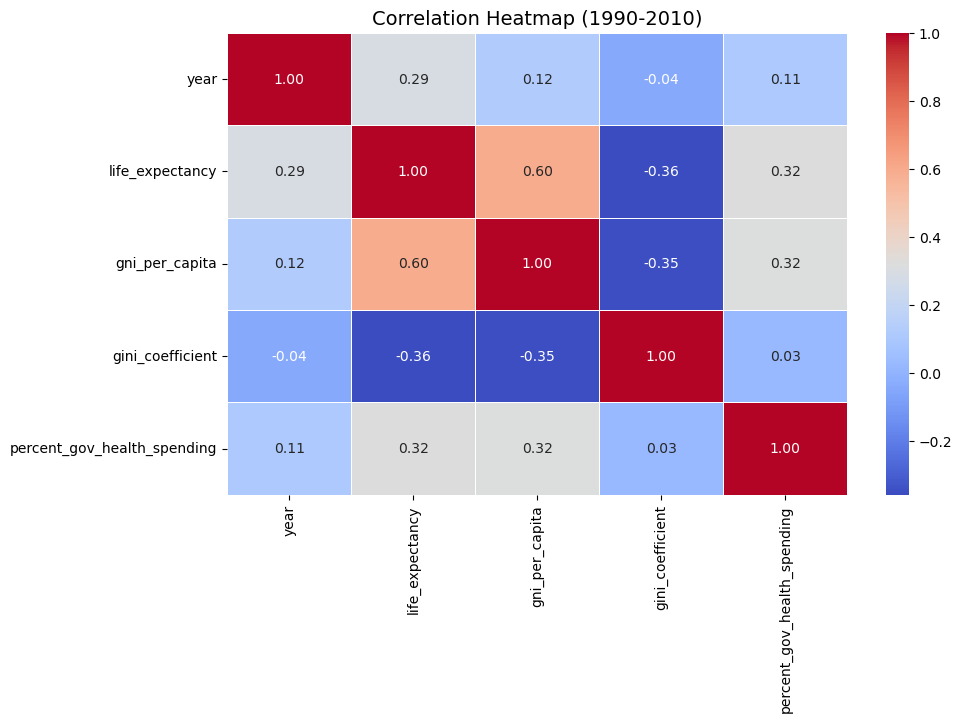

In [142]:
# Filtering dataset for years between 1990 and 2024
filtered_data = merged_health_data[(merged_health_data['year'] >= 1990) & (merged_health_data['year'] <= 2024)]

# Selecting only numeric columns
numeric_data = filtered_data.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap (1990-2010)", fontsize=14)
plt.show()
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

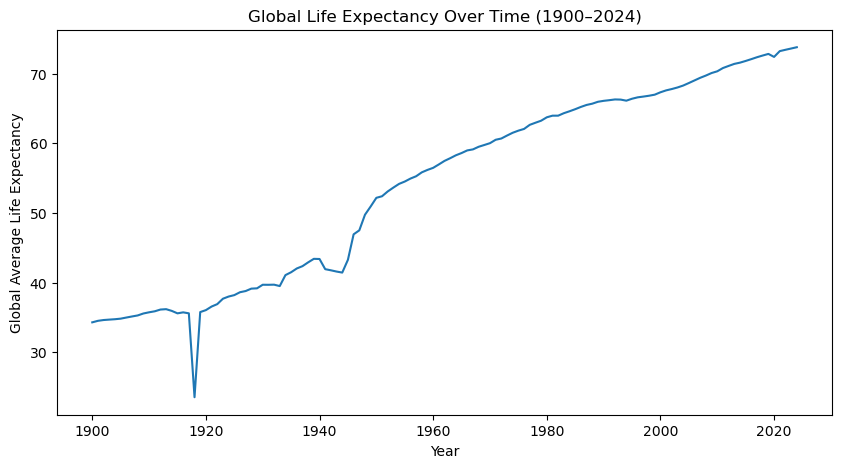

In [143]:
# Visualizing global life expectancy over tme with a line plot
global_life_expectancy_over_year = merged_health_data[(merged_health_data["year"] >= 1900) & (merged_health_data["year"] <= 2024)]

plt.figure(figsize=(10, 5))
sns.lineplot(data=global_life_expectancy_over_year, x="year", y="life_expectancy", errorbar=None)
plt.xlabel("Year")
plt.ylabel("Global Average Life Expectancy")
plt.title("Global Life Expectancy Over Time (1900–2024)")
plt.show()
# https://seaborn.pydata.org/generated/seaborn.lineplot.html

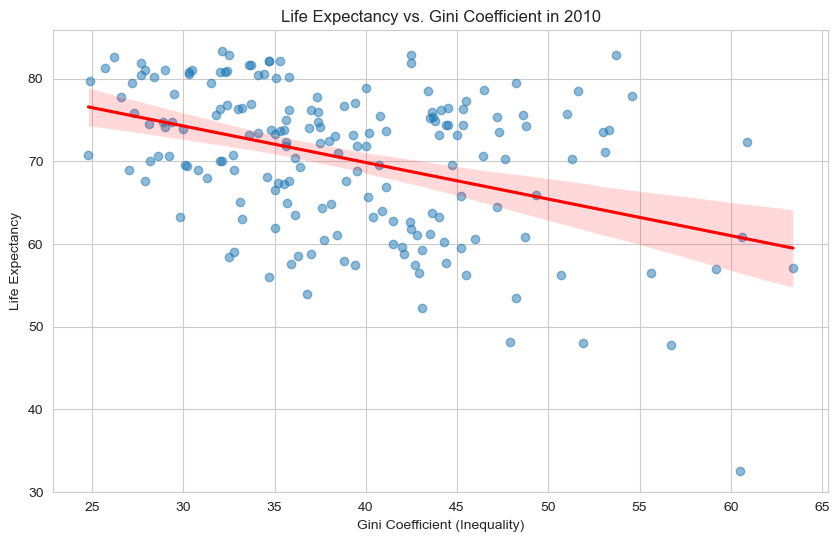

In [144]:
# Scatter Plot: Life Expectancy vs. Gini Coefficient in 2010
global_life_expectancy_over_gini = merged_health_data[(merged_health_data["year"] == 2010)]

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.regplot(
    data=global_life_expectancy_over_gini, 
    x="gini_coefficient", 
    y="life_expectancy", 
    scatter_kws={'alpha': 0.5}, 
    line_kws={'color': 'red'}
)
plt.xlabel("Gini Coefficient (Inequality)")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy vs. Gini Coefficient in 2010")
plt.show()
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html

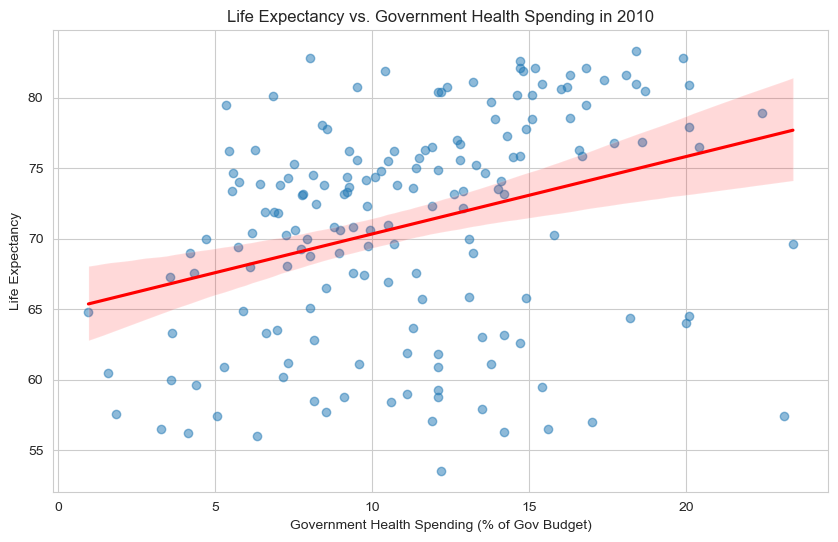

In [145]:
# Scatter Plot: Life Expectancy vs. Gov health spending in 2010
global_life_expectancy_over_gov = merged_health_data[(merged_health_data["year"] == 2010) & (merged_health_data['percent_gov_health_spending'] <= 25) & (merged_health_data['life_expectancy'] > 50)]

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.regplot(
    data=global_life_expectancy_over_gov, 
    x="percent_gov_health_spending", 
    y="life_expectancy", 
    scatter_kws={'alpha': 0.5}, 
    line_kws={'color': 'red'}
)
plt.xlabel("Government Health Spending (% of Gov Budget)")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy vs. Government Health Spending in 2010")
plt.show()

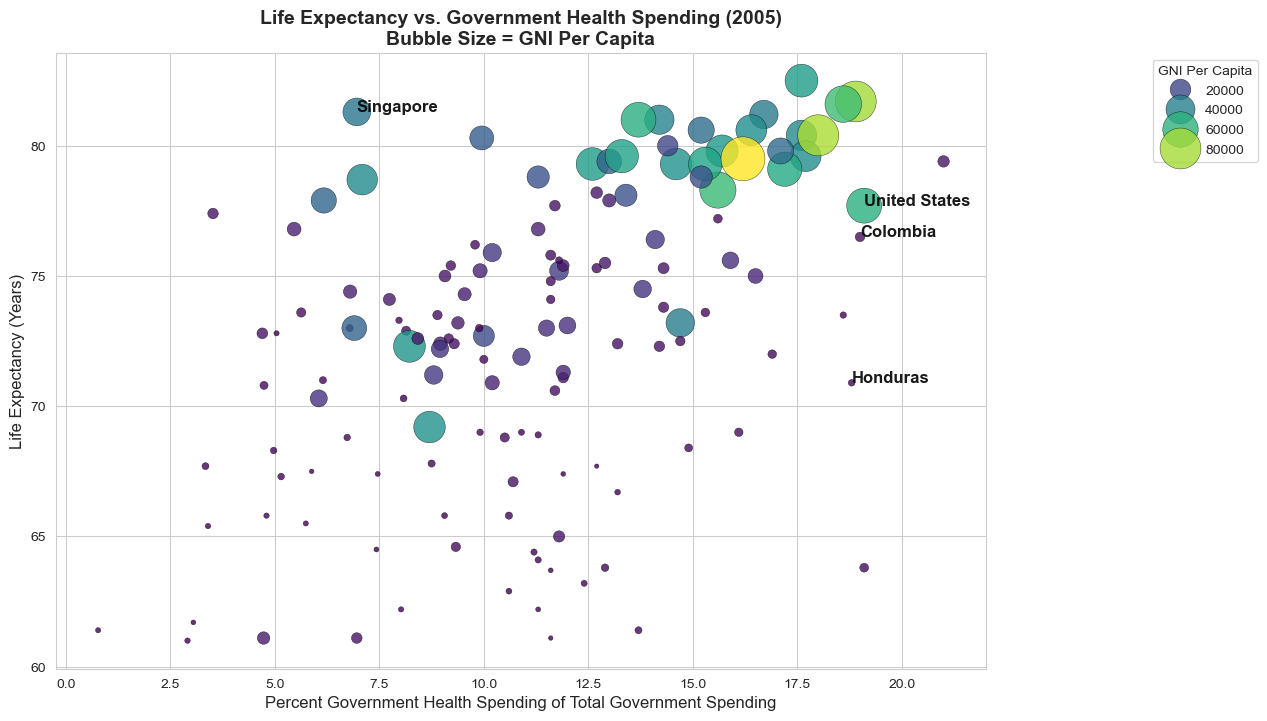

In [146]:
# Lets define our key countries
key_countries = ["United States", "Colombia", "Honduras", "Singapore", "South Africa"]

# Lets visualize a bubble chart with life expectancy on y-axis and gov health spending on x-axis. Size of the bubble will be gni.
# Filtering for clarity
df_latest = merged_health_data[merged_health_data["year"] == 2005]
df_filtered = df_latest[(df_latest["percent_gov_health_spending"] < 25) & 
                        (df_latest["life_expectancy"] > 60)]

# Creating the chart
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=df_filtered,
    x="percent_gov_health_spending",
    y="life_expectancy",
    size="gni_per_capita",
    sizes=(10, 1000),  # Adjust size scaling
    hue="gni_per_capita",
    palette="viridis",  # Colorblind-friendly colormap
    edgecolor="black",
    alpha=0.8
)

# Labeling the key countries
for i, row in df_filtered.iterrows():
    if row["country"] in key_countries:
        plt.text(row["percent_gov_health_spending"], row["life_expectancy"], 
                 row["country"], fontsize=12, fontweight='bold', alpha=0.9, color="black")
# https://www.geeksforgeeks.org/add-text-inside-the-plot-in-matplotlib/
# labeling the chart
plt.xlabel("Percent Government Health Spending of Total Government Spending", fontsize=12)
plt.ylabel("Life Expectancy (Years)", fontsize=12)
plt.title(f"Life Expectancy vs. Government Health Spending (2005)\nBubble Size = GNI Per Capita", fontsize=14, fontweight='bold')
plt.legend(title="GNI Per Capita", loc="upper right", bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.show()
# https://python-graph-gallery.com/bubble-plot-with-seaborn/


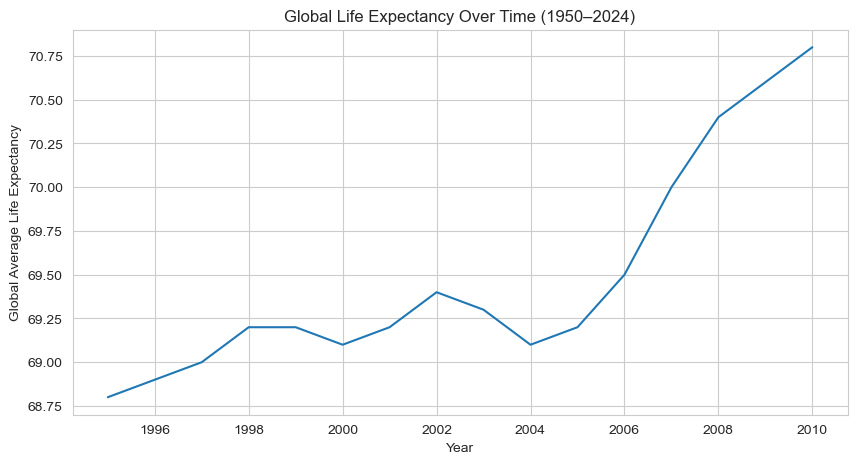

In [147]:
# Taking a look at USA life expectancy trends
usa_data = merged_health_data[(merged_health_data["year"] >= 1995) & (merged_health_data["year"] <= 2010) & (merged_health_data["country"] == "United Arab Emirates")]

plt.figure(figsize=(10, 5))
sns.lineplot(data=usa_data, x="year", y="life_expectancy", errorbar=None)
plt.xlabel("Year")
plt.ylabel("Global Average Life Expectancy")
plt.title("Global Life Expectancy Over Time (1950–2024)")
plt.show()

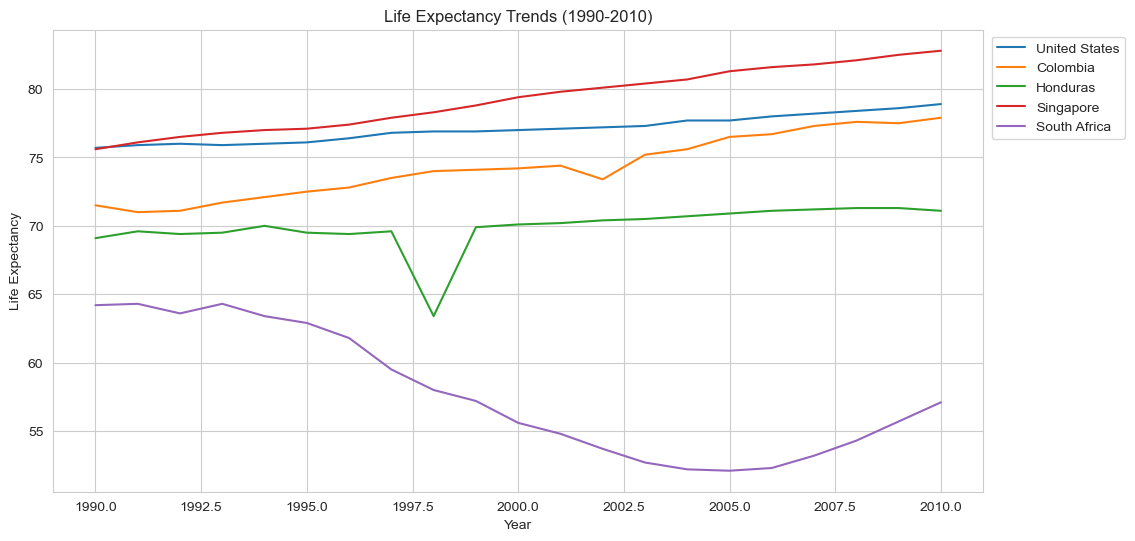

In [148]:
# Comparing the trends of our key countries, we will first filter to only see data of our key countries between
# 1990 and 2010.
filtered_countries = merged_health_data[(merged_health_data['country'].isin(key_countries)) & 
                                        (merged_health_data['year'] >= 1990) & 
                                        (merged_health_data['year'] <= 2010)]

# Ploting life expectancy trends of our key countrues
plt.figure(figsize=(12, 6))
for country in key_countries:
    subset = filtered_countries[filtered_countries['country'] == country]
    plt.plot(subset['year'], subset['life_expectancy'], label=country)

plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy Trends (1990-2010)")
plt.legend(loc = "upper right", bbox_to_anchor=(1.16, 1))
plt.show() 
# https://www.geeksforgeeks.org/plot-multiple-lines-in-matplotlib/

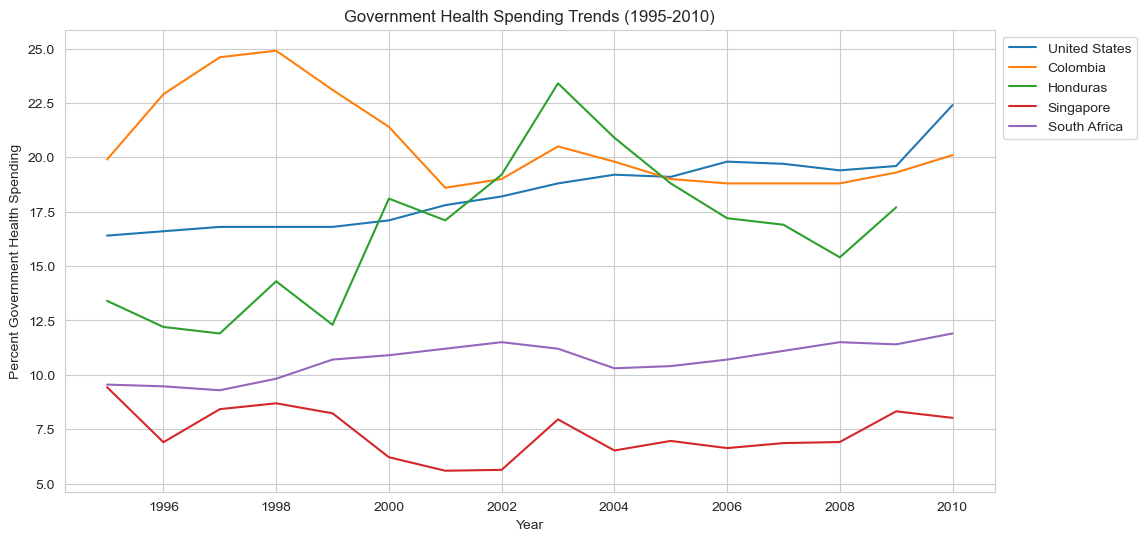

In [149]:
# Ploting gov health spending trends of key countries
plt.figure(figsize=(12, 6))
for country in key_countries:
    subset = filtered_countries[filtered_countries['country'] == country]
    plt.plot(subset['year'], subset['percent_gov_health_spending'], label=country)

plt.xlabel("Year")
plt.ylabel("Percent Government Health Spending")
plt.title("Government Health Spending Trends (1995-2010)")
plt.legend(loc = "upper right", bbox_to_anchor=(1.16, 1))
plt.show()

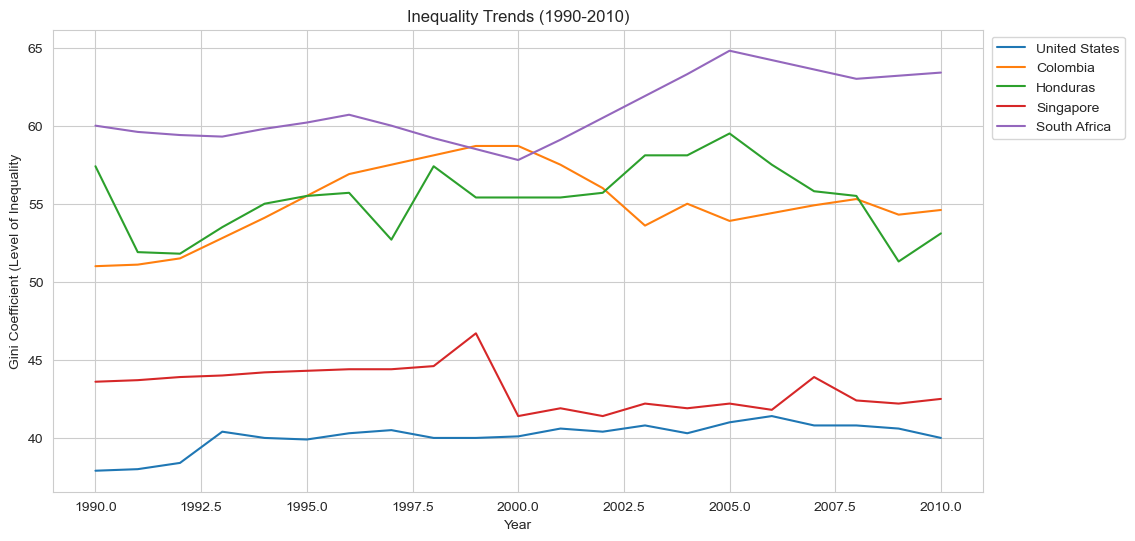

In [150]:
# Plotting inequality trends of our key countries
plt.figure(figsize=(12, 6))
for country in key_countries:
    subset = filtered_countries[filtered_countries['country'] == country]
    plt.plot(subset['year'], subset['gini_coefficient'], label=country)

plt.xlabel("Year")
plt.ylabel("Gini Coefficient (Level of Inequality")
plt.title("Inequality Trends (1990-2010)")
plt.legend(loc = "upper right", bbox_to_anchor=(1.16, 1))
plt.show()

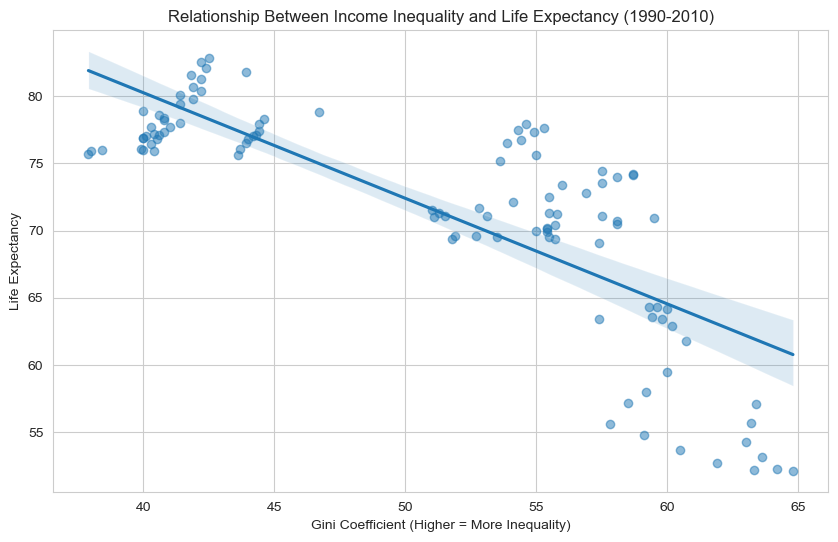

In [151]:
# Running a reggresion plot of our key countries and the relationsjip between inequality and life expectancy.
plt.figure(figsize=(10, 6))
sns.regplot(data=filtered_countries, x="gini_coefficient", y="life_expectancy", scatter_kws={'alpha':0.5})
plt.title("Relationship Between Income Inequality and Life Expectancy (1990-2010)")
plt.xlabel("Gini Coefficient (Higher = More Inequality)")
plt.ylabel("Life Expectancy")
plt.show()
# https://stackoverflow.com/questions/6148207/linear-regression-with-matplotlib-numpy
# https://www.geeksforgeeks.org/seaborn-regression-plots/

/var/folders/k9/3tn6m1vs7vv28wc7bsh3y12m0000gn/T/ipykernel_10966/920191721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  facet_data["spending_category"] = pd.qcut(facet_data["percent_gov_health_spending"], q=3, labels=["Low", "Medium", "High"])


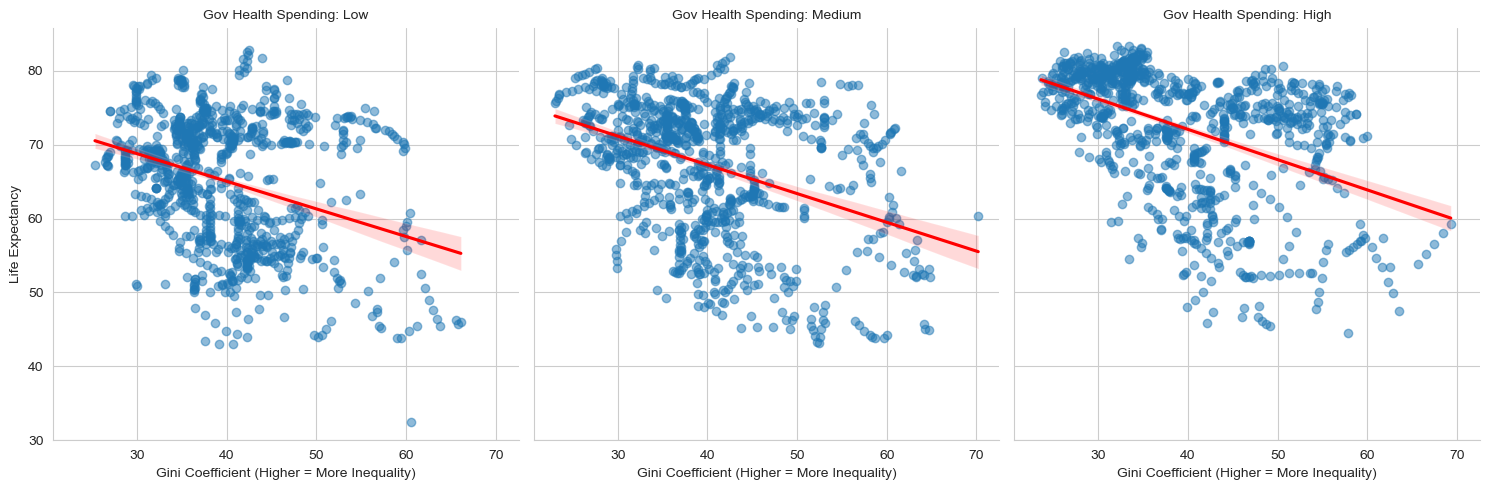

In [152]:
# Binning our original merged_health_data into 3 spending categories and labeling them into a separate column
facet_data = merged_health_data[(merged_health_data["year"] >= 1995) & (merged_health_data["year"] <= 2010) ]
facet_data["spending_category"] = pd.qcut(facet_data["percent_gov_health_spending"], q=3, labels=["Low", "Medium", "High"])

# https://pandas.pydata.org/docs/reference/api/pandas.qcut.html

# Creating the grid.
g = sns.lmplot(
    data=facet_data,
    x="gini_coefficient",
    y="life_expectancy",
    col="spending_category",
    height=5,
    aspect=1,
    scatter_kws={'alpha': 0.5},  
    line_kws={'color': 'red'}  
)

g.set_axis_labels("Gini Coefficient (Higher = More Inequality)", "Life Expectancy")
g.set_titles(col_template="Gov Health Spending: {col_name}")

plt.show()
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

**Next I will  run a regression model to determine what fields are significant as well as create a new column which will multiply gini coefficient and government health spending to see weather their relationship mitigates life expectancy to a significant extent.**

In [154]:
# Dropping null varialbles for the model.
df_clean = merged_health_data.dropna(subset=["life_expectancy", "gini_coefficient", "percent_gov_health_spending"])

In [155]:
df_clean = df_clean.copy() 
df_clean.loc[:, "gini_x_spending"] = df_clean["gini_coefficient"] * df_clean["percent_gov_health_spending"]
# https://www.statsmodels.org/stable/api.html

In [156]:
# Defining the formula, model, and printing results
formula = "life_expectancy ~ gini_coefficient + percent_gov_health_spending + gini_x_spending"
model = smf.ols(formula=formula, data=df_clean).fit()
print(model.summary())
#  https://www.geeksforgeeks.org/ordinary-least-squares-ols-using-statsmodels/
# https://www.statsmodels.org/stable/api.html

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     318.7
Date:                Sat, 22 Feb 2025   Prob (F-statistic):          1.63e-178
Time:                        22:22:06   Log-Likelihood:                -10000.
No. Observations:                2864   AIC:                         2.001e+04
Df Residuals:                    2860   BIC:                         2.003e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

**What we learn from the model**

* A higher inequality (higher Gini) is associated with lower life expectancy. This supports our initial idea that inequality negatively affects longevity.
*  Higher spending is associated with longer life expectancy.
*  The relationship between inequality and life expectancy doesn’t change much based on government spending levels.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

**To-Do:** A key conclusion was that a higher percent in government health spending correlates with increased life expectancy. Another key finding is that there is a negative relationship between the Gini Coeficient(which a larger number represents a larger inequality) and life expectancy. However, the correlation between percent government health spending and inequality was not  statistically significant (p=0.851).
* Inequality matters: Higher Gini coefficient is associated with lower life expectancy.
* Government health spending helps: More spending is associated with longer life expectancy.
* No combined effect: The relationship between inequality and life expectancy doesn’t change much based on government spending levels.

Reccomendations:

* Increase government health spending in low-income countries: The data suggests that even a moderate increase can lead to significant gains in life expectancy.
* Target spending efficiency: Countries with similar spending levels but different outcomes suggest that how funds are allocated may be just as important as the amount spent.
* Impose heavy sanctions to countries who do not take these appropriate measures.
